# Подготовка данных

In [39]:
%matplotlib inline
from hyperopt import hp, fmin, tpe, Trials, STATUS_OK
import sklearn
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

In [40]:
# df = pd.read_csv(r"InternationalBifurca_DATA_2023-10-30_0629.csv", sep=',')
df = pd.read_csv(r"InternationalBifurca_DATA_2025-04-20_0932.csv", sep=',')

/var/folders/2x/tx689lxn54ngmttr2b89rvg00000gn/T/ipykernel_47069/3738330455.py:2: DtypeWarning: Columns (264) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(r"InternationalBifurca_DATA_2025-04-20_0932.csv", sep=',')


In [41]:
# import pandas as pd
# import os

# # Create logs directory if it doesn't exist
# os.makedirs('logs', exist_ok=True)

# # Load the dataframes
# df1 = pd.read_csv("InternationalBifurca_DATA_2023-10-30_0629.csv", sep=',')
# df2 = pd.read_csv("InternationalBifurca_DATA_2025-04-20_0932.csv", sep=',')

# # Get columns for each dataframe
# cols_df1 = set(df1.columns)
# cols_df2 = set(df2.columns)

# # Find the differences
# cols_only_in_df1 = cols_df1 - cols_df2
# cols_only_in_df2 = cols_df2 - cols_df1

# # Write results to log file
# with open('logs/column_comparison_2025-04-21.txt', 'w') as f:
#     f.write("Columns only in df1 (2023-10-30):\n")
#     for col in sorted(cols_only_in_df1):
#         f.write(f"- {col}\n")
    
#     f.write("\nColumns only in df2 (2025-04-20):\n")
#     for col in sorted(cols_only_in_df2):
#         f.write(f"- {col}\n")
    
#     f.write("\nTotal differences:\n")
#     f.write(f"- {len(cols_only_in_df1)} columns unique to df1\n")
#     f.write(f"- {len(cols_only_in_df2)} columns unique to df2\n")
    
# # Also print to console
# print("Columns only in df1 (2023-10-30):")
# for col in sorted(cols_only_in_df1):
#     print(f"- {col}")

# print("\nColumns only in df2 (2025-04-20):")
# for col in sorted(cols_only_in_df2):
#     print(f"- {col}")

# print("\nTotal differences:")
# print(f"- {len(cols_only_in_df1)} columns unique to df1")
# print(f"- {len(cols_only_in_df2)} columns unique to df2")

In [42]:
df = df.dropna(subset=['sex'])
df

,record_id,identifier,date,adhoc_pci,sex,age,weight,height,clinical_presentation,time_from_mi_symptoms_onse,...,time_to_death_f5,time_to_acs_f5,time_to_stroke_f5,time_to_pci_f5,time_to_cabg_f5,hospitalization_f5,bleeding_f5,angio_follow_f5,restenosis_f5,side_branch_restenosis_5
0,MNRI0001,MNRI-2018-0001,2018-02-01,1.0,2.0,77.0,84.0,165.0,5.0,4.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,MNRI0002,MNRI-2018-0002,2018-01-24,0.0,1.0,68.0,81.0,171.0,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,MNRI0003,MNRI-2018-0003,2018-01-24,0.0,1.0,62.0,74.0,180.0,4.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,MNRI0004,MNRI-2018-0004,2018-01-30,1.0,1.0,67.0,84.0,167.0,2.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,MNRI0005,MNRI-2018-0005,2018-01-30,0.0,1.0,57.0,103.0,174.0,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2139,TRCH0026,TRCH-2019-0026,2019-03-11,1.0,1.0,67.0,90.0,174.0,2.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2140,TRCH0027,TRCH-2019-0027,2019-03-18,1.0,1.0,69.0,60.0,174.0,3.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2141,TRCH0028,TRCH-2019-0028,2019-03-19,0.0,2.0,81.0,50.0,160.0,2.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2142,TRCH0029,TRCH-2019-0029,2019-03-28,1.0,1.0,86.0,74.0,170.0,3.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [43]:
anyInf = df[df == np.inf].sum()
anyInf[anyInf != 0]

stent_distal_vessel_size    inf
sb_stent_sb_diametr         inf
dtype: object

In [44]:
patient_info_cols = ['record_id', 'date', 'sex', 'age', 'adhoc_pci', 'weight', 'height', 
                     'clinical_presentation', 'time_from_mi_symptoms_onse', 
                     'ccs_class', 'diabet', 'insulin_diabetes', 'hypertension', 'smoking', 
                     'dyslipidemia', 'anemia', 'atrial_fibrilation', 'oac_use', 'valvular_disease', 
                     'valvular_disease_was_previ', 'if_yes_what_type___1', 'if_yes_what_type___2', 
                     'if_yes_what_type___3', 'if_yes_what_type___4', 'if_yes_what_type___5', 
                     'if_yes_what_type___6', 'if_yes_what_type___7', 'ef', 'creatinine', 'ckd', 
                     'mi_history', 'cerebrovascular_disease', 'previously_treated_cerebro', 'previous_stroke_tia', 
                     'peripheral_artery_disease', 'previously_treated_periphe', 'copd', 'history_of_cancer', 
                     'previous_pci', 'previous_cabg']

intervention_cols = ['single_vessel', 'trifurcation', 'bifurcation_location', 
                  'lesion_ivolves', 'angle', 'calcium', 'trombosis', 
                  'total_trobotic_occlusion', 'restenosis_reocclusion', 'cto_bifurc', 
                  'medina_proximal', 'medina_distal', 'medina_side', 'mb_length_proximal', 
                  'sb_length', 'proximal_diametr', 'distal_diametr', 'side_diametr', 'stenosis_proximal', 
                  'stenosis_distal', 'timi_flow_main_branch', 'side_stenosis', 'timi_flow_side_branch', 
                  'major_lm', 'major_non_lm', 'minor_criteria', 'main_branch_rvd', 'def', 'def_2']

operation_cols = ['side_protection', 'main_predilatation', 'side_predilat', 
                  'stent_was_implated_from_lm', 'stent_number', 'stent_number_bif', 'stent_technique', 
                  'first_stent_impanted', 'provisional_2_stent_techni', 'stent_direction', 'defered_stenting', 
                  'stent_diameter', 'stent_length', 'stent_type___1', 'stent_type___2', 'stent_type___3', 
                  'stent_type___4', 'stent_type___5', 'stent_type___6', 'stent_type___7', 'stent_type___9', 
                  'stent_type___8', 'dstent2', 'stent_length2', 'stent_distal_vessel_size', 
                  'sb_stent_side_branch_diametr', 'sb_stent_sb_diametr', 'twostent_technique', 
                  'sb_dilatation', 'stent_postdilatation', 'proximal_optimization', 'pot', 
                  'pot_balloon_diametr', 'kissing_post', 'modified_kis', 'several_kissing']

new_cols = ['adverse_event_followup_f2_v2', 'angio_follow_f5', 'antiplatalet_drug_was_chan',
            'attempt_to_dilate_stenting', 'ballooon_size_for_postdila', 'complete_revascularisation',
            'currently_on_dialysis', 'followup_1_year_do_not_complete_if_2nd_bifurcation_complete',
            'identifier', 'ishemia_test___1', 'ishemia_test___2', 'ishemia_test___3', 'ishemia_test___4',
            'kissing_post_2stent___1', 'kissing_post_2stent___2', 'left_main_stent_direction',
            'main_branch_calcification', 'mb_stenosis_f2', 'medina_side_branch_2', 'myocardial_ischemia',
            'myocardial_ishemia_was_det', 'number_of_kissing', 'number_of_kissing_2',
            'other_lesions_in_main_bran', 'other_lesions_in_side_brach',
            'patient_information_do_not_complete_if_2nd_bifurca_complete', 'pot_2', 'pot_balloon_diametr_2',
            'pot_balloon_length', 'pot_balloon_length_2', 'pressure2', 'reson_for_change_stopped___1',
            'reson_for_change_stopped___2', 'reson_for_change_stopped___3', 'restenosis_f5', 'sb_length_2',
            'sb_stenosis_f2', 'side_branch_calcification_2', 'side_branch_restenosis',
            'side_branch_restenosis_3', 'side_branch_restenosis_5', 'stent_pressure', 'stent_type_2___1',
            'stent_type_2___2', 'stent_type_2___3', 'stent_type_2___4', 'stent_type_2___5', 'stent_type_2___6',
            'stent_type_2___7', 'stent_type_2___8', 'stent_type_2___9', 'thrombolysis', 'uncross_strategy___1',
            'uncross_strategy___2', 'uncross_strategy___3', 'uncross_strategy___4', 'uncross_strategy___5',
            'uncross_strategy___6', 'uncross_strategy___7', 'uncross_strategy___8', 'uncross_strategy___9']

In [45]:
non_vascular_deaths = ['MNRI1054', 'MNRI1191', 'MNRI1351', 'MNRI1352', 'MNRI1473', 'MNRI1670', 'MNRI0637', 'MNRI0656', 'MNRI0751', 'MNRI0758',
                      'MNRI0805', 'MNRI0818', 'MNRI1054', 'MNRI0087', 'MNRI1191', 'MNRI0108', 'MNRI0307', 'MNRI0215', 'MNRI0322', 'MNRI0293',
                      'MNRI0156', 'MNRI0215', 'MNRI0488', 'MNRI0612', 'MNRI0708', 'MNRI0767', 'MNRI0772', 'MNRI0786', 'MNRI1105', 'MNRI1186',
                      'MNRI1462', 'MNRI1633']

In [46]:
df = df[~df['record_id'].isin(non_vascular_deaths)]

In [47]:
df

,record_id,identifier,date,adhoc_pci,sex,age,weight,height,clinical_presentation,time_from_mi_symptoms_onse,...,time_to_death_f5,time_to_acs_f5,time_to_stroke_f5,time_to_pci_f5,time_to_cabg_f5,hospitalization_f5,bleeding_f5,angio_follow_f5,restenosis_f5,side_branch_restenosis_5
0,MNRI0001,MNRI-2018-0001,2018-02-01,1.0,2.0,77.0,84.0,165.0,5.0,4.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,MNRI0002,MNRI-2018-0002,2018-01-24,0.0,1.0,68.0,81.0,171.0,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,MNRI0003,MNRI-2018-0003,2018-01-24,0.0,1.0,62.0,74.0,180.0,4.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,MNRI0004,MNRI-2018-0004,2018-01-30,1.0,1.0,67.0,84.0,167.0,2.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,MNRI0005,MNRI-2018-0005,2018-01-30,0.0,1.0,57.0,103.0,174.0,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2139,TRCH0026,TRCH-2019-0026,2019-03-11,1.0,1.0,67.0,90.0,174.0,2.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2140,TRCH0027,TRCH-2019-0027,2019-03-18,1.0,1.0,69.0,60.0,174.0,3.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2141,TRCH0028,TRCH-2019-0028,2019-03-19,0.0,2.0,81.0,50.0,160.0,2.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2142,TRCH0029,TRCH-2019-0029,2019-03-28,1.0,1.0,86.0,74.0,170.0,3.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [48]:
patient_present_cols = patient_info_cols + intervention_cols + operation_cols + new_cols
patient_present_df = pd.DataFrame({col_name: df[col_name] for col_name in patient_present_cols})

In [49]:
patient_present_df

,record_id,date,sex,age,adhoc_pci,weight,height,clinical_presentation,time_from_mi_symptoms_onse,ccs_class,...,thrombolysis,uncross_strategy___1,uncross_strategy___2,uncross_strategy___3,uncross_strategy___4,uncross_strategy___5,uncross_strategy___6,uncross_strategy___7,uncross_strategy___8,uncross_strategy___9
0,MNRI0001,2018-02-01,2.0,77.0,1.0,84.0,165.0,5.0,4.0,NaN,...,0.0,0,0,0,0,0,0,0,0,0
1,MNRI0002,2018-01-24,1.0,68.0,0.0,81.0,171.0,1.0,NaN,1.0,...,NaN,0,0,0,0,0,0,0,0,0
2,MNRI0003,2018-01-24,1.0,62.0,0.0,74.0,180.0,4.0,NaN,NaN,...,NaN,0,0,0,0,0,0,0,0,0
3,MNRI0004,2018-01-30,1.0,67.0,1.0,84.0,167.0,2.0,NaN,NaN,...,NaN,0,0,0,0,0,0,0,0,0
4,MNRI0005,2018-01-30,1.0,57.0,0.0,103.0,174.0,1.0,NaN,2.0,...,NaN,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2139,TRCH0026,2019-03-11,1.0,67.0,1.0,90.0,174.0,2.0,NaN,NaN,...,0.0,0,0,0,0,0,0,0,0,0
2140,TRCH0027,2019-03-18,1.0,69.0,1.0,60.0,174.0,3.0,1.0,NaN,...,1.0,0,0,0,0,0,0,0,0,0
2141,TRCH0028,2019-03-19,2.0,81.0,0.0,50.0,160.0,2.0,NaN,NaN,...,0.0,0,0,0,0,0,0,0,0,0
2142,TRCH0029,2019-03-28,1.0,86.0,1.0,74.0,170.0,3.0,1.0,NaN,...,0.0,0,0,0,0,0,0,0,0,0


In [ ]:
def remove_columns_with_nan_threshold(df, threshold=250):
    columns_to_preserve = ['valvular_disease', 'previous_stroke_tia', 'twostent_technique']
    
    nan_counts = df.isnull().sum()
    
    columns_to_drop = [col for col in nan_counts[nan_counts > threshold].index 
                      if col not in columns_to_preserve]
    
    print(columns_to_drop)
    
    df_dropped = df.drop(columns=columns_to_drop)
    
    return df_dropped

In [51]:
patient_present_df = remove_columns_with_nan_threshold(patient_present_df, 500)

['time_from_mi_symptoms_onse', 'ccs_class', 'insulin_diabetes', 'valvular_disease_was_previ', 'previously_treated_cerebro', 'previously_treated_periphe', 'lesion_ivolves', 'total_trobotic_occlusion', 'sb_length', 'timi_flow_main_branch', 'timi_flow_side_branch', 'stent_was_implated_from_lm', 'first_stent_impanted', 'provisional_2_stent_techni', 'dstent2', 'stent_length2', 'sb_stent_side_branch_diametr', 'proximal_optimization', 'pot', 'pot_balloon_diametr', 'several_kissing', 'adverse_event_followup_f2_v2', 'angio_follow_f5', 'antiplatalet_drug_was_chan', 'attempt_to_dilate_stenting', 'ballooon_size_for_postdila', 'complete_revascularisation', 'left_main_stent_direction', 'main_branch_calcification', 'mb_stenosis_f2', 'medina_side_branch_2', 'myocardial_ischemia', 'myocardial_ishemia_was_det', 'number_of_kissing', 'number_of_kissing_2', 'other_lesions_in_main_bran', 'other_lesions_in_side_brach', 'pot_2', 'pot_balloon_diametr_2', 'pot_balloon_length', 'pot_balloon_length_2', 'pressure2

In [52]:
# patient_present_df = patient_present_df.drop(['record_id', 'date'], axis = 1)
patient_present_df = patient_present_df.drop(['date'], axis = 1)
patient_present_df

,record_id,sex,age,adhoc_pci,weight,height,clinical_presentation,diabet,hypertension,smoking,...,stent_type_2___9,uncross_strategy___1,uncross_strategy___2,uncross_strategy___3,uncross_strategy___4,uncross_strategy___5,uncross_strategy___6,uncross_strategy___7,uncross_strategy___8,uncross_strategy___9
0,MNRI0001,2.0,77.0,1.0,84.0,165.0,5.0,0.0,1.0,0.0,...,0,0,0,0,0,0,0,0,0,0
1,MNRI0002,1.0,68.0,0.0,81.0,171.0,1.0,0.0,1.0,0.0,...,0,0,0,0,0,0,0,0,0,0
2,MNRI0003,1.0,62.0,0.0,74.0,180.0,4.0,0.0,1.0,1.0,...,0,0,0,0,0,0,0,0,0,0
3,MNRI0004,1.0,67.0,1.0,84.0,167.0,2.0,0.0,1.0,0.0,...,0,0,0,0,0,0,0,0,0,0
4,MNRI0005,1.0,57.0,0.0,103.0,174.0,1.0,0.0,1.0,0.0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2139,TRCH0026,1.0,67.0,1.0,90.0,174.0,2.0,2.0,1.0,0.0,...,0,0,0,0,0,0,0,0,0,0
2140,TRCH0027,1.0,69.0,1.0,60.0,174.0,3.0,1.0,1.0,0.0,...,0,0,0,0,0,0,0,0,0,0
2141,TRCH0028,2.0,81.0,0.0,50.0,160.0,2.0,2.0,1.0,0.0,...,0,0,0,0,0,0,0,0,0,0
2142,TRCH0029,1.0,86.0,1.0,74.0,170.0,3.0,1.0,1.0,0.0,...,0,0,0,0,0,0,0,0,0,0


In [53]:
patient_present_df.replace(to_replace = [np.inf, -np.inf], value= None, inplace=True)

In [54]:
cols_to_drop = patient_present_df.columns[patient_present_df.nunique() <= 1]
patient_present_df = patient_present_df.drop(cols_to_drop, axis=1)
patient_present_df

,record_id,sex,age,adhoc_pci,weight,height,clinical_presentation,diabet,hypertension,smoking,...,stent_type_2___5,stent_type_2___6,stent_type_2___7,stent_type_2___8,uncross_strategy___1,uncross_strategy___2,uncross_strategy___3,uncross_strategy___4,uncross_strategy___8,uncross_strategy___9
0,MNRI0001,2.0,77.0,1.0,84.0,165.0,5.0,0.0,1.0,0.0,...,0,0,0,0,0,0,0,0,0,0
1,MNRI0002,1.0,68.0,0.0,81.0,171.0,1.0,0.0,1.0,0.0,...,0,0,0,0,0,0,0,0,0,0
2,MNRI0003,1.0,62.0,0.0,74.0,180.0,4.0,0.0,1.0,1.0,...,0,0,0,0,0,0,0,0,0,0
3,MNRI0004,1.0,67.0,1.0,84.0,167.0,2.0,0.0,1.0,0.0,...,0,0,0,0,0,0,0,0,0,0
4,MNRI0005,1.0,57.0,0.0,103.0,174.0,1.0,0.0,1.0,0.0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2139,TRCH0026,1.0,67.0,1.0,90.0,174.0,2.0,2.0,1.0,0.0,...,0,0,0,0,0,0,0,0,0,0
2140,TRCH0027,1.0,69.0,1.0,60.0,174.0,3.0,1.0,1.0,0.0,...,0,0,0,0,0,0,0,0,0,0
2141,TRCH0028,2.0,81.0,0.0,50.0,160.0,2.0,2.0,1.0,0.0,...,0,0,0,0,0,0,0,0,0,0
2142,TRCH0029,1.0,86.0,1.0,74.0,170.0,3.0,1.0,1.0,0.0,...,0,0,0,0,0,0,0,0,0,0


In [55]:
numerical = ['age', 'weight', 'height', 'ef', 'creatinine', 'ckd', 'angle', 'mb_length_proximal', 
            'proximal_diametr', 'distal_diametr', 'side_diametr', 'stenosis_proximal', 
            'stenosis_distal', 'side_stenosis', 'minor_criteria', 'main_branch_rvd', 
            'stent_diameter', 'stent_length', 'stent_distal_vessel_size', 'sb_stent_sb_diametr',
            # New numerical columns based on the analysis
            'ballooon_size_for_postdila', 
            'left_main_stent_direction',
            'mb_stenosis_f2',
            'myocardial_ischemia',
            'number_of_kissing_2',
            'pot_balloon_diametr_2',
            'pot_balloon_length',
            'pot_balloon_length_2',
            'pressure2',
            'sb_length_2',
            'sb_stenosis_f2',
            'stent_pressure']

categorical = ['sex', 'clinical_presentation', 'bifurcation_location', 'stent_number', 
              'stent_number_bif', 'stent_technique', 'stent_direction']

binary = ['diabet', 'adhoc_pci', 'hypertension', 'smoking', 'dyslipidemia', 'anemia', 
         'atrial_fibrilation', 'oac_use', 'if_yes_what_type___1', 'if_yes_what_type___2',
         'if_yes_what_type___3', 'if_yes_what_type___4', 'if_yes_what_type___6', 
         'mi_history', 'cerebrovascular_disease', 'peripheral_artery_disease', 'copd', 
         'history_of_cancer', 'previous_pci', 'previous_cabg', 'single_vessel', 'trifurcation',
         'calcium', 'trombosis', 'restenosis_reocclusion', 'cto_bifurc', 
         'medina_proximal', 'medina_distal', 'medina_side', 'major_lm', 'major_non_lm',
         'def', 'def_2', 'side_protection', 'main_predilatation', 'side_predilat',
         'defered_stenting', 'stent_type___1', 'stent_type___2', 'stent_type___3', 'stent_type___4',
         'stent_type___5', 'stent_type___6', 'stent_type___7', 'stent_type___9', 'stent_type___8', 
         'sb_dilatation', 'stent_postdilatation', 'kissing_post', 'modified_kis',
         # New binary columns based on the analysis
         'currently_on_dialysis',
         'ishemia_test___1',
         'ishemia_test___2',
         'ishemia_test___3',
         'kissing_post_2stent___1',
         'kissing_post_2stent___2',
         'reson_for_change_stopped___1',
         'reson_for_change_stopped___2',
         'reson_for_change_stopped___3',
         'stent_type_2___1',
         'stent_type_2___3',
         'stent_type_2___4',
         'stent_type_2___5',
         'stent_type_2___6',
         'stent_type_2___7',
         'stent_type_2___8',
         'uncross_strategy___1',
         'uncross_strategy___2',
         'uncross_strategy___3',
         'uncross_strategy___4',
         'uncross_strategy___8',
         'uncross_strategy___9']

In [56]:
without_second_bif = df
adverse_events = without_second_bif['event_type_followup_f2___1'] \
| without_second_bif['event_type_followup_f2___2'] \
| without_second_bif['event_type_followup_f2_v2___1'] \
| without_second_bif['event_type_followup_f2_v2___2']
print(sum(adverse_events))
print(len(adverse_events))

158
2044


In [57]:
combined = zip(without_second_bif['event_type_followup_f2___1'],  
               without_second_bif['event_type_followup_f2___2'] * 2,
               without_second_bif['event_type_followup_f2_v2___1'] * 3, 
               without_second_bif['event_type_followup_f2_v2___2'] * 4)

combined_adverse_events = np.array([max(t) for t in combined])

In [58]:
unique, counts = np.unique(combined_adverse_events, return_counts=True)
value_counts = dict(zip(unique, counts))
print(value_counts)

{0: 1886, 1: 53, 2: 18, 3: 51, 4: 36}


In [59]:
id_col = patient_present_df['record_id']
patient_present_df = patient_present_df.drop(['record_id', 'identifier'], axis=1)

In [60]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(patient_present_df, combined_adverse_events, test_size=0.4, stratify=combined_adverse_events, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_test, y_test, test_size=0.5, stratify=y_test, random_state=42)

In [61]:
y_train[y_train != 0] = 1
y_test[y_test != 0] = 1
y_val[y_val != 0] = 1

In [62]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.impute import SimpleImputer

imputer_categorical = SimpleImputer(strategy='most_frequent')
X_train[categorical + binary] = imputer_categorical.fit_transform(X_train[categorical + binary])
X_test[categorical + binary] = imputer_categorical.transform(X_test[categorical + binary])
X_val[categorical + binary] = imputer_categorical.transform(X_val[categorical + binary])

imputer = IterativeImputer(random_state=0)
columns = list(X_train.columns)
X_train = pd.DataFrame(data = imputer.fit_transform(X_train), columns = columns)
X_test = pd.DataFrame(data = imputer.transform(X_test), columns = columns)
X_val = pd.DataFrame(data = imputer.transform(X_val), columns = columns)

X_train

,sex,age,adhoc_pci,weight,height,clinical_presentation,diabet,hypertension,smoking,dyslipidemia,...,stent_type_2___5,stent_type_2___6,stent_type_2___7,stent_type_2___8,uncross_strategy___1,uncross_strategy___2,uncross_strategy___3,uncross_strategy___4,uncross_strategy___8,uncross_strategy___9
0,1.0,41.0,0.0,100.000000,177.000000,5.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.0,56.0,1.0,81.000000,172.000000,4.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.0,55.0,1.0,87.535524,172.093993,3.0,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.0,79.0,0.0,61.000000,160.000000,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,1.0,61.0,1.0,84.000000,179.000000,2.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1221,2.0,69.0,0.0,111.000000,159.000000,1.0,2.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1222,1.0,57.0,0.0,96.000000,178.000000,1.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1223,1.0,63.0,0.0,80.000000,162.000000,1.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1224,1.0,75.0,0.0,165.000000,71.000000,1.0,0.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [64]:
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder(sparse_output=False)
df_for_ohe = pd.concat([X_train[categorical], X_test[categorical], X_val[categorical]], ignore_index=True)
ohe.fit(df_for_ohe)

OneHotEncoder(sparse_output=False)

In [65]:
def process_ohe(dataframe, cat_cols, encoder):
    encoded_columns = pd.DataFrame(encoder.transform(dataframe[cat_cols]))

    encoded_columns.columns = encoder.get_feature_names_out(cat_cols)

    dataframe = pd.concat([dataframe, encoded_columns], axis=1)

    dataframe.drop(cat_cols, axis=1, inplace=True)

    return dataframe

In [66]:
X_train = process_ohe(X_train, categorical, ohe)
X_test = process_ohe(X_test, categorical, ohe)
X_val = process_ohe(X_val, categorical, ohe)
X_train

,age,adhoc_pci,weight,height,diabet,hypertension,smoking,dyslipidemia,anemia,atrial_fibrilation,...,stent_number_bif_3.0,stent_number_bif_4.0,stent_technique_0.0,stent_technique_1.0,stent_direction_1.0,stent_direction_2.0,stent_direction_3.0,stent_direction_4.0,stent_direction_5.0,stent_direction_6.0
0,41.0,0.0,100.000000,177.000000,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,56.0,1.0,81.000000,172.000000,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,55.0,1.0,87.535524,172.093993,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,79.0,0.0,61.000000,160.000000,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,61.0,1.0,84.000000,179.000000,1.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1221,69.0,0.0,111.000000,159.000000,2.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
1222,57.0,0.0,96.000000,178.000000,1.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1223,63.0,0.0,80.000000,162.000000,1.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1224,75.0,0.0,165.000000,71.000000,0.0,1.0,1.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [67]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif

feature_selector = SelectKBest(f_classif, k=40)
X_feature_selection = feature_selector.fit_transform(X_train, y_train)
X_feature_selection.shape

strong_cols = []

feature_scores = feature_selector.scores_
features = X_train.columns
features_scores_sorted = sorted(zip(features, feature_scores), key=lambda x: x[1], reverse=True)
for col in features_scores_sorted[:30]:
    strong_cols.append(col[0])

/Users/ivan.petrov/HSE/.venv/lib/python3.12/site-packages/sklearn/feature_selection/_univariate_selection.py:111: UserWarning: Features [77] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/Users/ivan.petrov/HSE/.venv/lib/python3.12/site-packages/sklearn/feature_selection/_univariate_selection.py:112: RuntimeWarning: invalid value encountered in divide
  f = msb / msw


In [68]:
X_train = X_train[strong_cols]
X_test = X_test[strong_cols]
X_val = X_val[strong_cols]
X_train

,age,anemia,ef,cerebrovascular_disease,ckd,peripheral_artery_disease,if_yes_what_type___1,creatinine,single_vessel,calcium,...,stent_diameter,minor_criteria,stent_length,adhoc_pci,previous_pci,stent_type___4,cto_bifurc,valvular_disease,side_diametr,major_lm
0,41.0,0.0,49.0,0.0,91.130343,0.0,0.0,90.0,0.0,0.0,...,4.00,1.0,11.0,0.0,1.0,0.0,0.0,0.000000,2.4,0.0
1,56.0,0.0,68.0,0.0,83.132035,0.0,0.0,89.0,1.0,0.0,...,2.75,0.0,18.0,1.0,1.0,1.0,0.0,0.000000,3.0,0.0
2,55.0,0.0,70.0,0.0,78.364633,0.0,0.0,94.0,1.0,0.0,...,2.75,2.0,33.0,1.0,0.0,1.0,0.0,0.000000,2.4,0.0
3,79.0,0.0,73.0,1.0,64.542788,0.0,0.0,96.0,0.0,1.0,...,3.50,3.0,38.0,0.0,0.0,0.0,0.0,0.000000,3.1,0.0
4,61.0,0.0,62.0,0.0,87.329657,0.0,0.0,83.0,0.0,0.0,...,4.00,2.0,28.0,1.0,0.0,0.0,0.0,0.000000,2.5,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1221,69.0,0.0,60.0,0.0,69.608441,0.0,0.0,97.0,1.0,0.0,...,3.50,0.0,32.0,0.0,1.0,0.0,0.0,-0.048430,2.7,0.0
1222,57.0,0.0,39.0,0.0,53.707072,0.0,0.0,127.0,0.0,0.0,...,3.50,2.0,23.0,0.0,0.0,0.0,0.0,0.005881,2.4,0.0
1223,63.0,1.0,71.0,0.0,86.111321,0.0,0.0,83.0,1.0,0.0,...,2.75,2.0,18.0,0.0,1.0,0.0,0.0,0.000000,2.2,0.0
1224,75.0,0.0,69.0,1.0,68.979615,1.0,0.0,93.0,1.0,0.0,...,3.00,0.0,18.0,0.0,1.0,0.0,0.0,0.000000,2.4,0.0


In [69]:
X_train.columns

Index(['age', 'anemia', 'ef', 'cerebrovascular_disease', 'ckd',
       'peripheral_artery_disease', 'if_yes_what_type___1', 'creatinine',
       'single_vessel', 'calcium', 'stent_type___3', 'medina_side',
       'atrial_fibrilation', 'height', 'def', 'history_of_cancer',
       'stent_type___5', 'side_stenosis', 'side_predilat',
       'previous_stroke_tia', 'stent_diameter', 'minor_criteria',
       'stent_length', 'adhoc_pci', 'previous_pci', 'stent_type___4',
       'cto_bifurc', 'valvular_disease', 'side_diametr', 'major_lm'],
      dtype='object')

In [70]:
corr_matrix = X_train.corr().abs()

upper_triangle = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

threshold = 0.4

to_drop = [column for column in upper_triangle.columns if any(upper_triangle[column] > threshold)]

to_drop

['ckd',
 'creatinine',
 'side_stenosis',
 'side_predilat',
 'minor_criteria',
 'valvular_disease',
 'side_diametr',
 'major_lm']

In [71]:
X_train = X_train.drop(columns=to_drop)
X_test = X_test.drop(columns=to_drop)
X_val = X_val.drop(columns=to_drop)

X_train

,age,anemia,ef,cerebrovascular_disease,peripheral_artery_disease,if_yes_what_type___1,single_vessel,calcium,stent_type___3,medina_side,...,def,history_of_cancer,stent_type___5,previous_stroke_tia,stent_diameter,stent_length,adhoc_pci,previous_pci,stent_type___4,cto_bifurc
0,41.0,0.0,49.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.477395,4.00,11.0,0.0,1.0,0.0,0.0
1,56.0,0.0,68.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.313995,2.75,18.0,1.0,1.0,1.0,0.0
2,55.0,0.0,70.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.478905,2.75,33.0,1.0,0.0,1.0,0.0
3,79.0,0.0,73.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,3.50,38.0,0.0,0.0,0.0,0.0
4,61.0,0.0,62.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.448962,4.00,28.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1221,69.0,0.0,60.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.525775,3.50,32.0,0.0,1.0,0.0,0.0
1222,57.0,0.0,39.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.616766,3.50,23.0,0.0,0.0,0.0,0.0
1223,63.0,1.0,71.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.429977,2.75,18.0,0.0,1.0,0.0,0.0
1224,75.0,0.0,69.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.000000,3.00,18.0,0.0,1.0,0.0,0.0


In [72]:
X_train.columns

Index(['age', 'anemia', 'ef', 'cerebrovascular_disease',
       'peripheral_artery_disease', 'if_yes_what_type___1', 'single_vessel',
       'calcium', 'stent_type___3', 'medina_side', 'atrial_fibrilation',
       'height', 'def', 'history_of_cancer', 'stent_type___5',
       'previous_stroke_tia', 'stent_diameter', 'stent_length', 'adhoc_pci',
       'previous_pci', 'stent_type___4', 'cto_bifurc'],
      dtype='object')

In [73]:
print(X_train.shape)
print(X_val.shape)
print(X_test.shape)
print(y_train.shape)

(1226, 22)
(409, 22)
(409, 22)
(1226,)


In [74]:
print(X_train.columns)

Index(['age', 'anemia', 'ef', 'cerebrovascular_disease',
       'peripheral_artery_disease', 'if_yes_what_type___1', 'single_vessel',
       'calcium', 'stent_type___3', 'medina_side', 'atrial_fibrilation',
       'height', 'def', 'history_of_cancer', 'stent_type___5',
       'previous_stroke_tia', 'stent_diameter', 'stent_length', 'adhoc_pci',
       'previous_pci', 'stent_type___4', 'cto_bifurc'],
      dtype='object')


# edge case

In [75]:
import importlib
import edge_case
importlib.reload(edge_case)
from edge_case import generate_edge_cases

edge_cases = generate_edge_cases(num_samples=150)
edge_cases


ModuleNotFoundError: No module named 'edge_case'

In [76]:
edge_cases.columns

NameError: name 'edge_cases' is not defined

In [77]:
edge_case_cols = set(edge_cases.columns)
x_train_cols = set(X_train.columns)

common_cols = edge_case_cols.intersection(x_train_cols)
only_in_edge_cases = edge_case_cols - x_train_cols
only_in_x_train = x_train_cols - edge_case_cols

print(f"COMPARISON OF COLUMNS:")
print(f"\nTotal columns in edge_cases: {len(edge_case_cols)}")
print(f"Total columns in X_train: {len(x_train_cols)}")
print(f"Number of common columns: {len(common_cols)}")

print("\n--- COMMON COLUMNS ---")
for col in sorted(common_cols):
    print(f"- {col}")

print("\n--- COLUMNS ONLY IN EDGE CASES ---")
for col in sorted(only_in_edge_cases):
    print(f"- {col}")

print("\n--- COLUMNS ONLY IN X_TRAIN ---")
for col in sorted(only_in_x_train):
    print(f"- {col}")

NameError: name 'edge_cases' is not defined

# Syntetic data

In [78]:
X_train_with_ID = X_train.copy().reset_index(drop=False)
X_train_with_ID

,index,age,anemia,ef,cerebrovascular_disease,peripheral_artery_disease,if_yes_what_type___1,single_vessel,calcium,stent_type___3,...,def,history_of_cancer,stent_type___5,previous_stroke_tia,stent_diameter,stent_length,adhoc_pci,previous_pci,stent_type___4,cto_bifurc
0,0,41.0,0.0,49.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.477395,4.00,11.0,0.0,1.0,0.0,0.0
1,1,56.0,0.0,68.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.313995,2.75,18.0,1.0,1.0,1.0,0.0
2,2,55.0,0.0,70.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.478905,2.75,33.0,1.0,0.0,1.0,0.0
3,3,79.0,0.0,73.0,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.000000,3.50,38.0,0.0,0.0,0.0,0.0
4,4,61.0,0.0,62.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.448962,4.00,28.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1221,1221,69.0,0.0,60.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.525775,3.50,32.0,0.0,1.0,0.0,0.0
1222,1222,57.0,0.0,39.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.616766,3.50,23.0,0.0,0.0,0.0,0.0
1223,1223,63.0,1.0,71.0,0.0,0.0,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.429977,2.75,18.0,0.0,1.0,0.0,0.0
1224,1224,75.0,0.0,69.0,1.0,1.0,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,1.000000,3.00,18.0,0.0,1.0,0.0,0.0


In [79]:
X_train_with_ID_and_target = X_train_with_ID.copy()
X_train_with_ID_and_target['target'] = y_train
X_train_with_ID_and_target

,index,age,anemia,ef,cerebrovascular_disease,peripheral_artery_disease,if_yes_what_type___1,single_vessel,calcium,stent_type___3,...,history_of_cancer,stent_type___5,previous_stroke_tia,stent_diameter,stent_length,adhoc_pci,previous_pci,stent_type___4,cto_bifurc,target
0,0,41.0,0.0,49.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.477395,4.00,11.0,0.0,1.0,0.0,0.0,0
1,1,56.0,0.0,68.0,0.0,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.313995,2.75,18.0,1.0,1.0,1.0,0.0,0
2,2,55.0,0.0,70.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.478905,2.75,33.0,1.0,0.0,1.0,0.0,0
3,3,79.0,0.0,73.0,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.000000,3.50,38.0,0.0,0.0,0.0,0.0,0
4,4,61.0,0.0,62.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.448962,4.00,28.0,1.0,0.0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1221,1221,69.0,0.0,60.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.525775,3.50,32.0,0.0,1.0,0.0,0.0,1
1222,1222,57.0,0.0,39.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.616766,3.50,23.0,0.0,0.0,0.0,0.0,0
1223,1223,63.0,1.0,71.0,0.0,0.0,0.0,1.0,0.0,1.0,...,0.0,0.0,0.429977,2.75,18.0,0.0,1.0,0.0,0.0,0
1224,1224,75.0,0.0,69.0,1.0,1.0,0.0,1.0,0.0,1.0,...,0.0,0.0,1.000000,3.00,18.0,0.0,1.0,0.0,0.0,0


In [80]:
from synthcity.plugins import Plugins

# Print the list of available plugins
print(Plugins().list())

[KeOps] Warning : omp.h header is not in the path, disabling OpenMP. To fix this, you can set the environment
                  variable OMP_PATH to the location of the header before importing keopscore or pykeops,
                  e.g. using os.environ: import os; os.environ['OMP_PATH'] = '/path/to/omp/header'
[KeOps] Warning : Cuda libraries were not detected on the system or could not be loaded ; using cpu only mode


[2025-05-12T13:31:41.788513+0400][47069][CRITICAL] load failed: Failed to import transformers.trainer because of the following error (look up to see its traceback):
Failed to import transformers.integrations.integration_utils because of the following error (look up to see its traceback):
Failed to import transformers.modeling_tf_utils because of the following error (look up to see its traceback):
Your currently installed version of Keras is Keras 3, but this is not yet supported in Transformers. Please install the backwards-compatible tf-keras package with `pip install tf-keras`.
[2025-05-12T13:31:41.789128+0400][47069][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2025-05-12T13:31:41.789363+0400][47069][CRITICAL] module plugin_great load failed
[2025-05-12T13:31:41.906372+0400][47069][CRITICAL] module disabled: /Users/ivan.petrov/HSE/.venv/lib/python3.12/site-packages/synthcity/plugins/generic/plugin_goggle.py


['rtvae', 'timegan', 'bayesian_network', 'nflow', 'uniform_sampler', 'ctgan', 'survival_ctgan', 'radialgan', 'privbayes', 'fflows', 'image_cgan', 'dpgan', 'dummy_sampler', 'marginal_distributions', 'pategan', 'survae', 'ddpm', 'timevae', 'image_adsgan', 'survival_nflow', 'arf', 'aim', 'tvae', 'adsgan', 'decaf', 'survival_gan']


# Оптимизация RF на auc-roc для 10 фолдов

In [81]:
# X_train_new = pd.concat([X_train, syntetic_minority_dropped])
# X_train_new

In [82]:
# y_train_new = np.concatenate((y_train, syntetic_target))
# y_train_new

In [83]:
from sklearn.preprocessing import StandardScaler

scaller = StandardScaler()
scaller.fit(X_train)

StandardScaler()

In [84]:
import joblib

joblib.dump(scaller, "./scaler.save")

['./scaler.save']

In [85]:
X_train_folds = pd.concat([X_train, X_val])
y_train_k_fold = np.concatenate((y_train, y_val), axis=0)

In [86]:
scaled_features = scaller.transform(X_train_folds)

In [87]:
train_df = pd.DataFrame(data=scaled_features, columns=X_train_folds.columns)
train_df

,age,anemia,ef,cerebrovascular_disease,peripheral_artery_disease,if_yes_what_type___1,single_vessel,calcium,stent_type___3,medina_side,...,def,history_of_cancer,stent_type___5,previous_stroke_tia,stent_diameter,stent_length,adhoc_pci,previous_pci,stent_type___4,cto_bifurc
0,-2.317888,-0.228824,-0.659638,-0.379021,-0.288165,-0.155651,-0.926054,-0.517531,1.297194,-0.708838,...,-0.075779,-0.232745,-0.111294,0.162955,1.435755,-1.606619,-0.834094,1.163257,-0.360491,-0.286501
1,-0.791826,-0.228824,1.121135,-0.379021,-0.288165,-0.155651,1.079851,-0.517531,-0.770894,1.410760,...,-0.075779,4.296547,-0.111294,-0.730225,-0.985738,-0.768527,1.198906,1.163257,2.773993,-0.286501
2,-0.893563,-0.228824,1.308584,-0.379021,-0.288165,-0.155651,1.079851,-0.517531,-0.770894,-0.708838,...,-0.075779,-0.232745,-0.111294,0.171210,-0.985738,1.027385,1.198906,-0.859655,2.773993,-0.286501
3,1.548135,-0.228824,1.589759,2.638378,-0.288165,-0.155651,-0.926054,1.932250,-0.770894,-0.708838,...,-0.075779,-0.232745,-0.111294,-2.446583,0.467158,1.626022,-0.834094,-0.859655,-0.360491,-0.286501
4,-0.283139,-0.228824,0.558786,-0.379021,-0.288165,-0.155651,-0.926054,-0.517531,-0.770894,-0.708838,...,-0.075779,4.296547,-0.111294,0.007535,1.435755,0.428748,1.198906,-0.859655,-0.360491,-0.286501
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1630,-0.690089,-0.228824,0.465061,-0.379021,-0.288165,-0.155651,1.079851,-0.517531,-0.770894,1.410760,...,-0.075779,-0.232745,-0.111294,0.080058,0.467158,-0.768527,-0.834094,1.163257,-0.360491,-0.286501
1631,1.649873,4.370167,-0.940812,-0.379021,-0.288165,-0.155651,-0.926054,1.932250,1.297194,-0.708838,...,-0.075779,-0.232745,-0.111294,1.474545,-0.501439,-1.127710,-0.834094,1.163257,-0.360491,-0.286501
1632,0.429023,-0.228824,0.652510,-0.379021,-0.288165,-0.155651,-0.926054,1.932250,-0.770894,-0.708838,...,-0.075779,4.296547,-0.111294,-0.326126,0.467158,-0.169890,-0.834094,1.163257,-0.360491,-0.286501
1633,-0.283139,-0.228824,0.090161,-0.379021,-0.288165,6.424629,1.079851,1.932250,-0.770894,1.410760,...,-0.075779,-0.232745,-0.111294,-0.335178,-0.501439,0.668203,1.198906,1.163257,-0.360491,-0.286501


In [88]:
from __future__ import annotations

import json
import time
from dataclasses import dataclass
from functools import partial
from pathlib import Path
from typing import Any, Dict, List, Tuple

import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from hyperopt import STATUS_OK, Trials, fmin, hp, tpe
from sklearn.metrics import (
    accuracy_score,
    f1_score,
    precision_score,
    recall_score,
    roc_auc_score,
)
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import StandardScaler
from simplical_smote_kdd.ssmote import BorderlineSimplicialSMOTE, SimplicialSMOTE
import joblib

# ────────────────────────────────────────────────────────────────────────────────
# Types & constants
# ────────────────────────────────────────────────────────────────────────────────
MetricTuple = Tuple[float, float, float, float, float]  # roc, f1, prec, rec, acc
CHECKPOINT_FILE = Path("ssb_randomforest.joblib")
THRESHOLD_FILE = Path("ssb_randomforest_best_threshold.npy")
SCORES_FILE = Path("scores_ssb_randomforest.json")


# ────────────────────────────────────────────────────────────────────────────────
# Helper utilities
# ────────────────────────────────────────────────────────────────────────────────
@dataclass(frozen=True)
class FoldResult:
    roc_auc: float
    f1: float
    precision: float
    recall: float
    accuracy: float
    threshold: float


def _prepare_fold(
    X: np.ndarray | pd.DataFrame,
    y: np.ndarray | pd.Series | pd.DataFrame,
    train_idx: np.ndarray,
    test_idx: np.ndarray,
) -> Tuple[np.ndarray, np.ndarray, np.ndarray, np.ndarray]:
    """Slice, scale, oversample and return numpy arrays."""
    # Slice --------------------------------------------------------------------
    X_train, X_val = (
        (X.iloc[train_idx].values, X.iloc[test_idx].values)
        if isinstance(X, pd.DataFrame)
        else (X[train_idx], X[test_idx])
    )
    y_train, y_val = (
        (y.iloc[train_idx].values, y.iloc[test_idx].values)
        if isinstance(y, (pd.Series, pd.DataFrame))
        else (y[train_idx], y[test_idx])
    )

    # Scale --------------------------------------------------------------------
    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_val = scaler.transform(X_val)

    # SMOTE --------------------------------------------------------------------
    X_res, y_res = BorderlineSimplicialSMOTE(random_state=42).fit_resample(X_train, y_train)
    return X_res, y_res, X_val, y_val


def _opt_threshold(y_true: np.ndarray, prob: np.ndarray) -> float:
    """Return threshold maximising ROC-AUC on validation fold."""
    # ROC-AUC is threshold-independent, so we'll use Youden's J statistic 
    # (sensitivity + specificity - 1) which is a point metric derived from ROC
    thresholds = np.linspace(0.1, 0.9, 20)  # More granular thresholds
    j_scores = []
    
    for t in thresholds:
        pred = (prob > t).astype(int)
        # True positive rate (sensitivity)
        tpr = np.sum((pred == 1) & (y_true == 1)) / max(1, np.sum(y_true == 1))
        # True negative rate (specificity)
        tnr = np.sum((pred == 0) & (y_true == 0)) / max(1, np.sum(y_true == 0))
        # Youden's J statistic
        j_scores.append(tpr + tnr - 1)
    
    # Return threshold that maximizes Youden's J
    return float(thresholds[int(np.argmax(j_scores))])


def _evaluate_fold(y_true: np.ndarray, prob: np.ndarray, thr: float) -> MetricTuple:
    """Return all metrics for a single fold."""
    pred = (prob > thr).astype(int)
    return (
        roc_auc_score(y_true, prob),
        f1_score(y_true, pred, zero_division=0),
        precision_score(y_true, pred, zero_division=0),
        recall_score(y_true, pred, zero_division=0),
        accuracy_score(y_true, pred),
    )


# ────────────────────────────────────────────────────────────────────────────────
# Objective
# ────────────────────────────────────────────────────────────────────────────────
def objective(
    params: Dict[str, Any],
    X: np.ndarray | pd.DataFrame,
    y: np.ndarray | pd.Series | pd.DataFrame,
) -> Dict[str, Any]:
    # Reduced from 10 to 5 folds for faster computation
    kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

    fold_results: List[FoldResult] = []
    best_model = None
    best_roc = -np.inf

    # Convert hyper-opt parameters to RandomForest format
    rf_params = {
        'n_estimators': int(params['n_estimators']),
        'max_depth': int(params['max_depth']) if params['max_depth'] is not None else None,
        'min_samples_split': int(params['min_samples_split']),
        'min_samples_leaf': int(params['min_samples_leaf']),
        'max_features': params['max_features'],
        'bootstrap': params['bootstrap'],
        'class_weight': {0: params.get('weight_major', 1.0), 1: params['weight_minor']},
        'random_state': 42,
        'n_jobs': -1,  # Use all available cores
    }

    for train_idx, val_idx in kf.split(X, y):
        X_res, y_res, X_val, y_val = _prepare_fold(X, y, train_idx, val_idx)

        # Train Random Forest model
        model = RandomForestClassifier(**rf_params)
        model.fit(X_res, y_res)

        # Predict & evaluate
        prob = model.predict_proba(X_val)[:, 1]
        thr = _opt_threshold(y_val, prob)
        roc, f1, prec, rec, acc = _evaluate_fold(y_val, prob, thr)

        fold_results.append(FoldResult(roc, f1, prec, rec, acc, thr))

        # Select best model based on ROC-AUC
        if roc > best_roc:
            best_roc, best_model = roc, model

    # Save best model and threshold
    mean_roc = float(np.mean([fr.roc_auc for fr in fold_results]))
    if best_model:
        joblib.dump(best_model, CHECKPOINT_FILE)
        np.save(THRESHOLD_FILE, max(fold_results, key=lambda fr: fr.roc_auc).threshold)

    # Write all metrics in one JSON file
    SCORES_FILE.write_text(
        json.dumps(
            {
                "metrics": [fr.__dict__ for fr in fold_results],
                "mean_metrics": {
                    "roc_auc": mean_roc,
                    "f1": np.mean([fr.f1 for fr in fold_results]),
                    "precision": np.mean([fr.precision for fr in fold_results]),
                    "recall": np.mean([fr.recall for fr in fold_results]),
                    "accuracy": np.mean([fr.accuracy for fr in fold_results]),
                },
                "params": {k: v if not isinstance(v, dict) else str(v) for k, v in rf_params.items()},
            },
            indent=2,
            default=lambda x: float(x) if isinstance(x, (np.float32, np.int64)) else x,  # Handle NumPy types
        )
    )

    # Tiny delay to throttle filesystem spam in notebooks
    time.sleep(1.0)
    print(f"Mean ROC-AUC={mean_roc:.4f} | params={params}")
    return {"loss": -mean_roc, "status": STATUS_OK}


# ────────────────────────────────────────────────────────────────────────────────
# Search space & execution
# ────────────────────────────────────────────────────────────────────────────────
search_space: Dict[str, Any] = {
    "n_estimators": hp.quniform("n_estimators", 100, 500, 50),
    "max_depth": hp.choice("max_depth", [None, 10, 20, 30, 40, 50]),
    "min_samples_split": hp.quniform("min_samples_split", 2, 10, 1),
    "min_samples_leaf": hp.quniform("min_samples_leaf", 1, 5, 1),
    "max_features": hp.choice("max_features", ["sqrt", "log2"]),
    "bootstrap": hp.choice("bootstrap", [True]),
    "weight_minor": hp.uniform("weight_minor", 1, 5),
    "weight_major": hp.uniform("weight_major", 0.1, 1),
}


def run_optimisation(X: pd.DataFrame | np.ndarray, y: pd.Series | np.ndarray) -> None:
    trials = Trials()
    best_raw: Dict[str, int | float] = fmin(
        fn=partial(objective, X=X, y=y),
        space=search_space,
        algo=tpe.suggest,
        max_evals=100,
        trials=trials,
    )
    
    # Convert numeric parameters to integers where needed
    best_final = best_raw.copy()
    for param in ["n_estimators", "min_samples_split", "min_samples_leaf"]:
        if param in best_final:
            best_final[param] = int(best_final[param])
    
    # Handle max_depth specially since it can be None
    if "max_depth" in best_final:
        max_depth_options = [None, 10, 20, 30, 40, 50]
        best_final["max_depth"] = max_depth_options[int(best_final["max_depth"])]
    
    # Handle categorical parameters
    if "max_features" in best_final:
        max_features_options = ["sqrt", "log2"]
        best_final["max_features"] = max_features_options[int(best_final["max_features"])]
    
    if "bootstrap" in best_final:
        bootstrap_options = [True]
        best_final["bootstrap"] = bootstrap_options[int(best_final["bootstrap"])]
    
    print("Best hyper-parameters:", json.dumps(best_final, indent=2, default=lambda x: float(x) if isinstance(x, (np.float32, np.int64)) else str(x)))

run_optimisation(X_train, y_train)

Mean ROC-AUC=0.6720 | params={'bootstrap': True, 'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 4.0, 'min_samples_split': 6.0, 'n_estimators': 250.0, 'weight_major': 0.7427246433727543, 'weight_minor': 2.4745960991167495}
Mean ROC-AUC=0.6571 | params={'bootstrap': True, 'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 2.0, 'min_samples_split': 10.0, 'n_estimators': 400.0, 'weight_major': 0.5297547568503946, 'weight_minor': 2.5295258076447227}
Mean ROC-AUC=0.6703 | params={'bootstrap': True, 'max_depth': 50, 'max_features': 'sqrt', 'min_samples_leaf': 3.0, 'min_samples_split': 3.0, 'n_estimators': 200.0, 'weight_major': 0.6655199899774668, 'weight_minor': 2.9978814145847044}
Mean ROC-AUC=0.6515 | params={'bootstrap': True, 'max_depth': 20, 'max_features': 'sqrt', 'min_samples_leaf': 1.0, 'min_samples_split': 9.0, 'n_estimators': 450.0, 'weight_major': 0.2602302925328741, 'weight_minor': 3.5314751947997998}
Mean ROC-AUC=0.6543 | params={'bootstrap': True, 'max

KeyboardInterrupt: 

Test set evaluation results:
ROC AUC: 0.6606
F1 Score: 0.1463
Precision: 0.0792
Recall: 0.9677
Accuracy: 0.1443


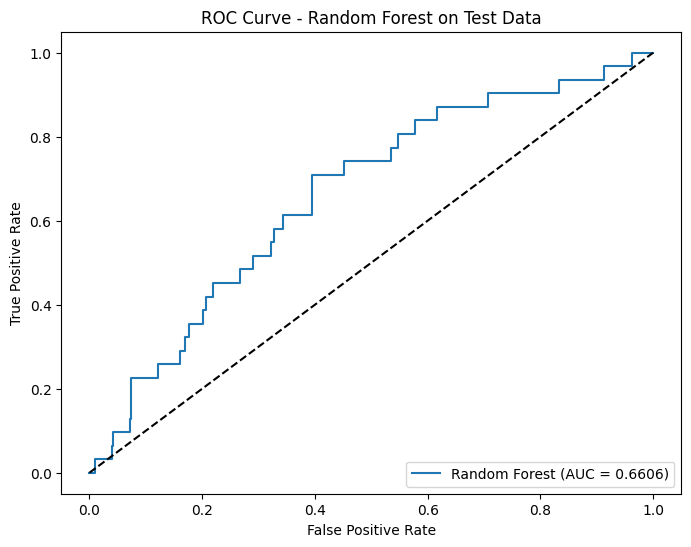

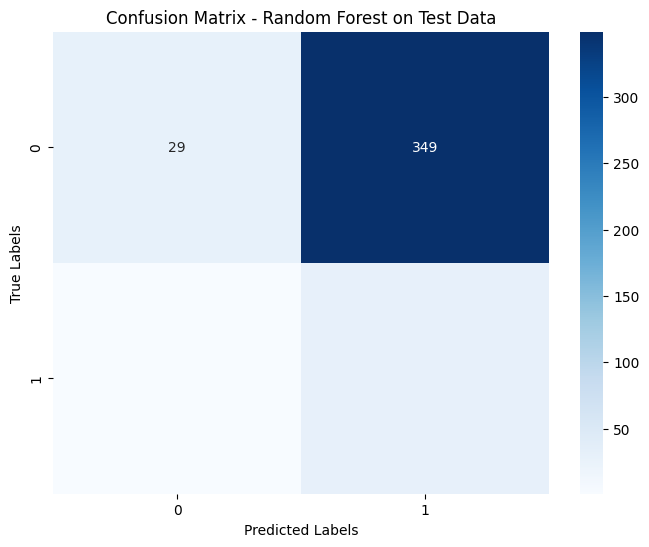

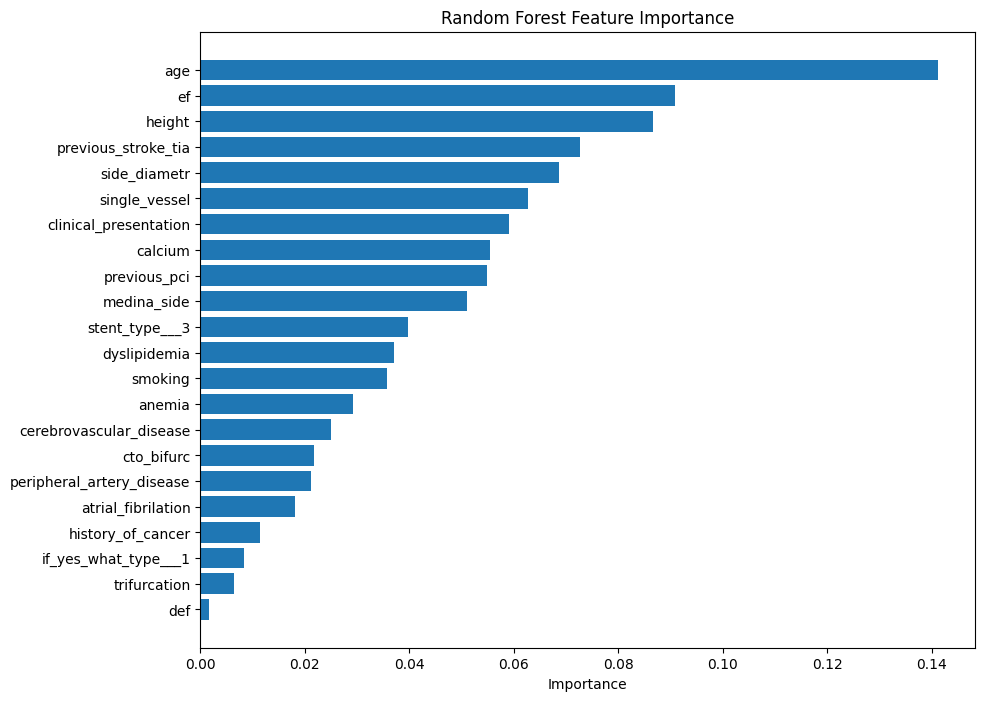

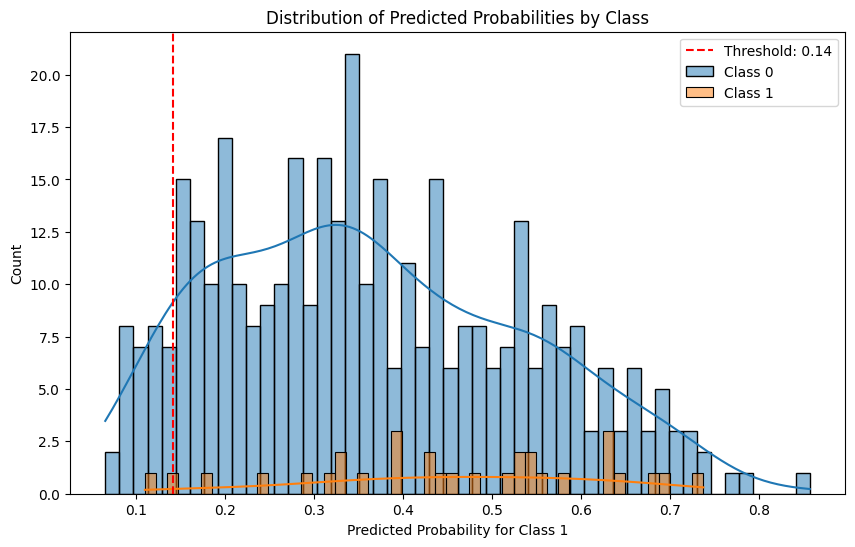

In [60]:
def evaluate_random_forest_on_test_data():
    """
    Evaluate the best Random Forest model on test data and save results.
    """
    # Load the best model
    best_model = joblib.load('ssb_randomforest.joblib')
    
    # Prepare test data
    X_test_scaled = scaller.transform(X_test)
    
    # Make predictions
    pred_prob = best_model.predict_proba(X_test_scaled)[:, 1]
    
    # For Random Forest, we can optimize the threshold just like with CatBoost
    # Find optimal threshold using validation data or use default 0.5
    threshold = 0.5
    threshold_file = Path('ssb_randomforest_best_threshold.npy')
    if threshold_file.exists():
        threshold = float(np.load(threshold_file))
    
    pred_labels = (pred_prob > threshold).astype(int)
    
    # Calculate metrics
    test_roc_auc = roc_auc_score(y_test, pred_prob)
    test_f1 = f1_score(y_test, pred_labels)
    test_precision = precision_score(y_test, pred_labels)
    test_recall = recall_score(y_test, pred_labels)
    test_accuracy = accuracy_score(y_test, pred_labels)
    
    # Print results
    print("Test set evaluation results:")
    print(f"ROC AUC: {test_roc_auc:.4f}")
    print(f"F1 Score: {test_f1:.4f}")
    print(f"Precision: {test_precision:.4f}")
    print(f"Recall: {test_recall:.4f}")
    print(f"Accuracy: {test_accuracy:.4f}")
    
    # Save results to file
    with open('test_results_rf_ssb.txt', 'w') as file:
        file.write(f"Test ROC AUC: {test_roc_auc:.4f}\n")
        file.write(f"Test F1 Score: {test_f1:.4f}\n")
        file.write(f"Test Precision: {test_precision:.4f}\n")
        file.write(f"Test Recall: {test_recall:.4f}\n")
        file.write(f"Test Accuracy: {test_accuracy:.4f}\n")
    
    # Plot ROC curve
    from sklearn.metrics import roc_curve
    import matplotlib.pyplot as plt
    import seaborn as sns
    
    fpr, tpr, _ = roc_curve(y_test, pred_prob)
    
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, label=f'Random Forest (AUC = {test_roc_auc:.4f})')
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve - Random Forest on Test Data')
    plt.legend(loc='lower right')
    # plt.savefig('rf_smote_roc_curve.png', dpi=300, bbox_inches='tight')
    plt.show()
    
    # Plot confusion matrix
    from sklearn.metrics import confusion_matrix
    cm = confusion_matrix(y_test, pred_labels)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.title('Confusion Matrix - Random Forest on Test Data')
    # plt.savefig('rf_smote_confusion_matrix.png', dpi=300, bbox_inches='tight')
    plt.show()
    
    # Feature importance plot
    feature_importance = best_model.feature_importances_
    feature_names = X_test.columns if hasattr(X_test, 'columns') else [f'Feature {i}' for i in range(X_test.shape[1])]
    
    # Sort features by importance
    sorted_idx = np.argsort(feature_importance)
    plt.figure(figsize=(10, 8))
    plt.barh(range(len(sorted_idx)), feature_importance[sorted_idx])
    plt.yticks(range(len(sorted_idx)), np.array(feature_names)[sorted_idx])
    plt.title('Random Forest Feature Importance')
    plt.xlabel('Importance')
    # plt.savefig('rf_smote_feature_importance.png', dpi=300, bbox_inches='tight')
    plt.show()
    
    # Additional visualization: Plot class probabilities distribution
    plt.figure(figsize=(10, 6))
    sns.histplot(pred_prob[y_test == 0], bins=50, alpha=0.5, label='Class 0', kde=True)
    sns.histplot(pred_prob[y_test == 1], bins=50, alpha=0.5, label='Class 1', kde=True)
    plt.axvline(x=threshold, color='red', linestyle='--', label=f'Threshold: {threshold:.2f}')
    plt.xlabel('Predicted Probability for Class 1')
    plt.ylabel('Count')
    plt.title('Distribution of Predicted Probabilities by Class')
    plt.legend()
    # plt.savefig('rf_smote_probability_distribution.png', dpi=300, bbox_inches='tight')
    plt.show()
    
    return test_roc_auc, test_f1, test_precision, test_recall, test_accuracy

# Run the evaluation
test_metrics = evaluate_random_forest_on_test_data()